In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [3]:
airline=pd.read_excel(r'C:\Users\vikra\Downloads\Airlines+Data.xlsx')
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

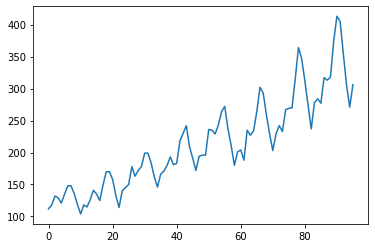

In [4]:
airline.Passengers.plot()

In [5]:
airline['Month']=pd.to_datetime(airline.Month,format="%b-%y")

In [6]:
airline['month']=airline.Month.dt.strftime('%b')
airline['Year']=airline.Month.dt.strftime('%Y')

In [7]:
month_dummies= pd.DataFrame(pd.get_dummies(airline['month']))
airline1 = pd.concat([airline,month_dummies],axis = 1)
airline1.head()


,Month,Passengers,month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [8]:
airline1["t"] = np.arange(1,97)
airline1["t_squared"] = airline1["t"]*airline1["t"]
airline1["log_Passengers"] = np.log(airline1["Passengers"])
airline1.columns
airline1.head()

,Month,Passengers,month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


<AxesSubplot:xlabel='Month', ylabel='Passengers'>

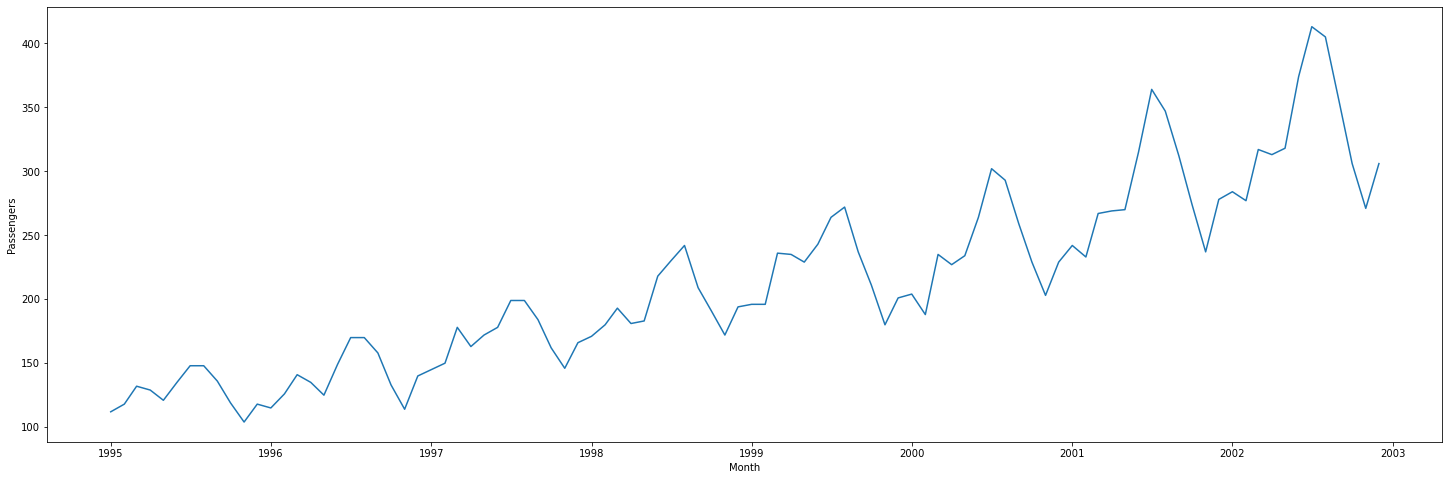

In [9]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.lineplot(x = "Month",y = "Passengers", data = airline1)

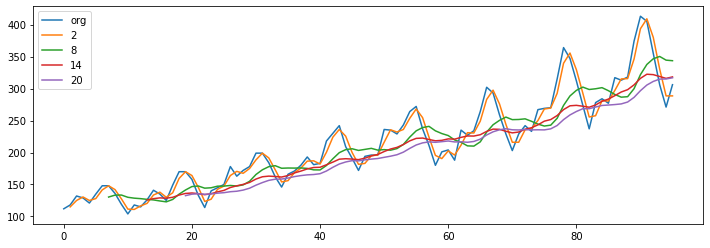

In [10]:
plt.figure(figsize=(12,4))
airline1.Passengers.plot(label="org")
for i in range(2,24,6):
    airline1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

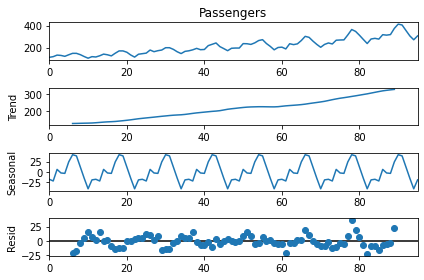

In [11]:
decompose_ts_add = seasonal_decompose(airline1.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

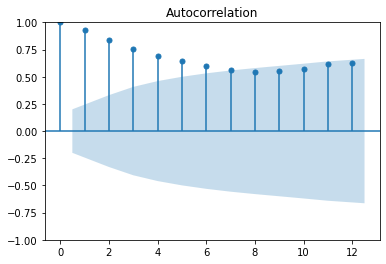

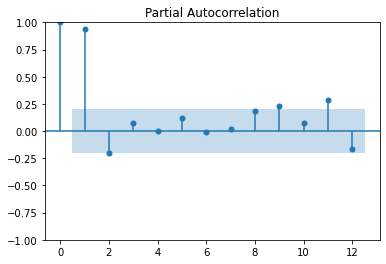

In [12]:
#ACF plots and PACF plots

import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airline1.Passengers,lags=12)
tsa_plots.plot_pacf(airline1.Passengers,lags=12)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

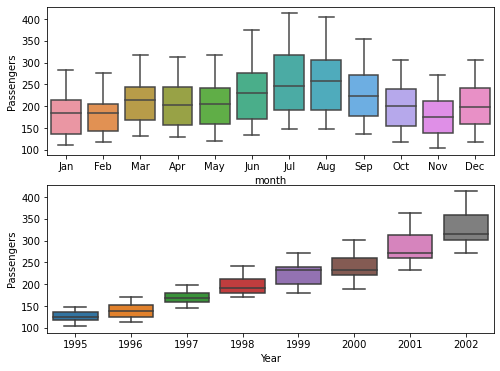

In [13]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airline1)
plt.subplot(212)
sns.boxplot(x="Year",y="Passengers",data=airline1)

<AxesSubplot:xlabel='month', ylabel='Passengers'>

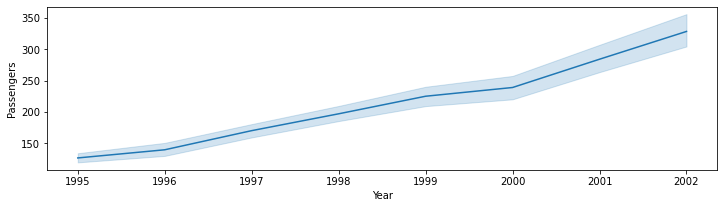

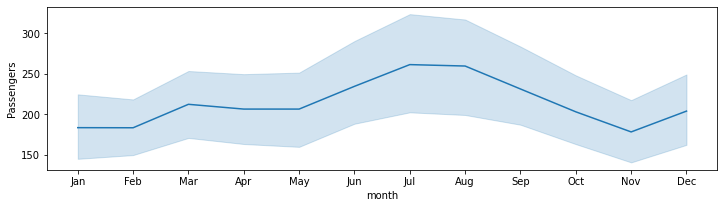

In [14]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=airline1)
plt.figure(figsize=(12,3))
sns.lineplot(x="month",y="Passengers",data=airline1)

In [15]:
airline1.shape

(96, 19)

In [16]:
Train = airline1.head(82)
Test = airline1.tail(14)

In [17]:
# linear model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

49.69965520001811

In [18]:
#Exponential

Exp=smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.100631066437295

In [19]:
#Quadratic

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

45.969011379581694

In [20]:
#Additive Seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.76282062960817

In [21]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_Quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_Quad))**2))
rmse_add_sea_Quad

24.13267489562391

In [22]:
#Multiplicative Seasonality

mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mul_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

136.36757602244188

In [23]:
#Multiplicative Additive Seasonality

mul_sea_Quad = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mul_sea_Quad = pd.Series(mul_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t']]))
rmse_mul_sea_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mul_sea_Quad)))**2))
rmse_mul_sea_Quad

9.876834921441196

In [24]:
#compare the results 

data = {"model":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea",'rmse_add_sea_Quad','rmse_mul_sea','rmse_mul_sea_Quad']),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_Quad,rmse_mul_sea,rmse_mul_sea_Quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,model,RMSE_Values
6,rmse_mul_sea_Quad,9.876835
4,rmse_add_sea_Quad,24.132675
2,rmse_Quad,45.969011
1,rmse_Exp,46.100631
0,rmse_linear,49.699655
3,rmse_add_sea,129.762821
5,rmse_mul_sea,136.367576


In [25]:
#Build the model on entire data set
final_mul_sea_Quad = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=airline1).fit()

In [26]:
final_pred_mul_sea_Quad = pd.Series(final_mul_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t']]))
final_rmse_mul_sea_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(final_pred_mul_sea_Quad)))**2))
final_rmse_mul_sea_Quad

8.481716457531771

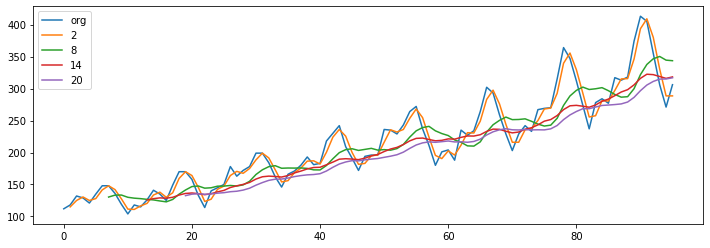

In [27]:
plt.figure(figsize=(12,4))
airline1.Passengers.plot(label="org")
for i in range(2,24,6):
    airline1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

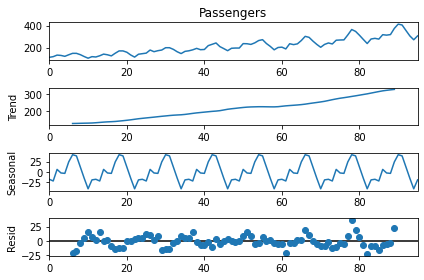

In [28]:
decompose_ts_add = seasonal_decompose(airline1.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

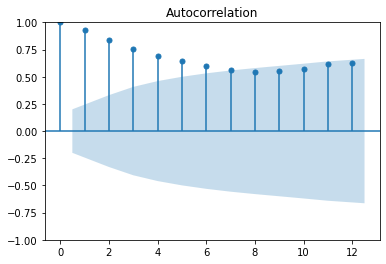

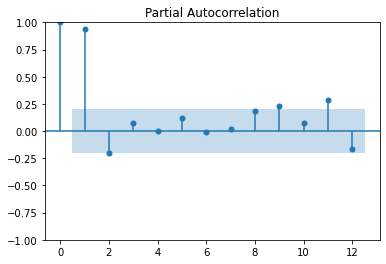

In [29]:
#ACF plots and PACF plots

import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airline1.Passengers,lags=12)
tsa_plots.plot_pacf(airline1.Passengers,lags=12)
plt.show()

In [30]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [31]:
#Simple Exponential Method

ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

12.187436123357298

In [32]:
#Holt method

hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

18.56785389077194

In [33]:
#Holts winter exponential smoothing with additive seasonality and additive trend

hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

5.788438043799083

In [34]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

3.440893767738468

In [35]:
### Final Model by combining train and test

hwe_model_add_add = ExponentialSmoothing(airline1["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [36]:
hwe_model_add_add.forecast(10)

96     319.235309
97     311.528442
98     350.278768
99     346.985086
100    351.845152
101    403.925810
102    440.566873
103    427.446506
104    376.628192
105    329.767552
dtype: float64

In [37]:
##Building Time series forcasting with ARIMA

In [38]:
X = airline1['Passengers'].values

In [39]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

In [40]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   63
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -263.583
Date:                Mon, 29 Aug 2022   AIC                            539.167
Time:                        12:43:03   BIC                            551.929
Sample:                             0   HQIC                           544.178
                                 - 63                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1062      0.160      0.663      0.507      -0.208       0.420
ar.L2         -0.1976      0.170     -1.159      0.246      -0.532       0.136
ar.L3         -0.0706      0.126     -0.562      0.5

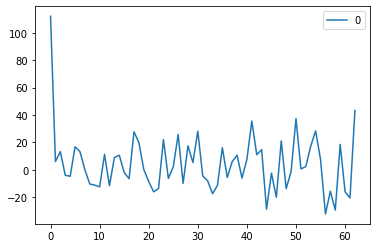

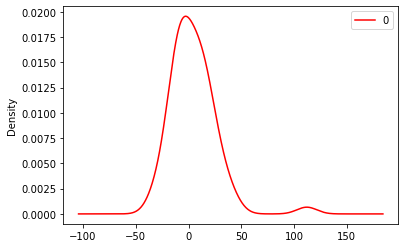

                0
count   63.000000
mean     4.228944
std     21.710779
min    -32.213037
25%    -10.165143
50%      0.616449
75%     15.360977
max    112.000000


In [41]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde',color='red')
pyplot.show()
print(residuals.describe())

In [42]:
# rolling Forecast ARIMA Model

In [43]:
history = [x for x in train]

In [44]:
predictions = list()

In [45]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=237.351697, expected=227.000000
predicted=218.673588, expected=234.000000
predicted=235.603571, expected=264.000000
predicted=250.751821, expected=302.000000
predicted=306.236426, expected=293.000000
predicted=283.001988, expected=259.000000
predicted=247.529991, expected=229.000000
predicted=224.116737, expected=203.000000
predicted=207.700690, expected=229.000000
predicted=249.298532, expected=242.000000
predicted=248.869263, expected=233.000000
predicted=231.312583, expected=267.000000
predicted=266.498530, expected=269.000000
predicted=259.866113, expected=270.000000
predicted=269.604000, expected=315.000000
predicted=312.657188, expected=364.000000
predicted=368.277208, expected=347.000000
predicted=332.664432, expected=312.000000
predicted=298.257405, expected=274.000000
predicted=262.776570, expected=237.000000
predicted=240.179592, expected=278.000000
predicted=308.214176, expected=284.000000
predicted=287.379158, expected=277.000000
predicted=281.188134, expected=317

In [46]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 792.015


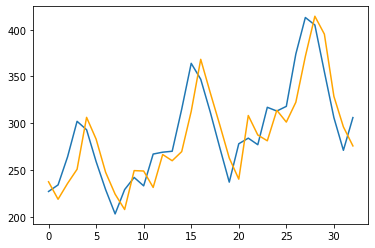

In [47]:
pyplot.plot(test)
pyplot.plot(predictions, color='orange')
pyplot.show()